<a href="https://colab.research.google.com/github/haosulab/SAPIEN-tutorial/blob/master/1_hello_world.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to SAPIEN

SAPIEN is a simulation platform for vision and robotics applications. You may use it to build reinforcement learning  environments with visual observations. Or you may use it to generate photorealistic images to train vision models.

<div style="width: 49%; display: inline-block;" >
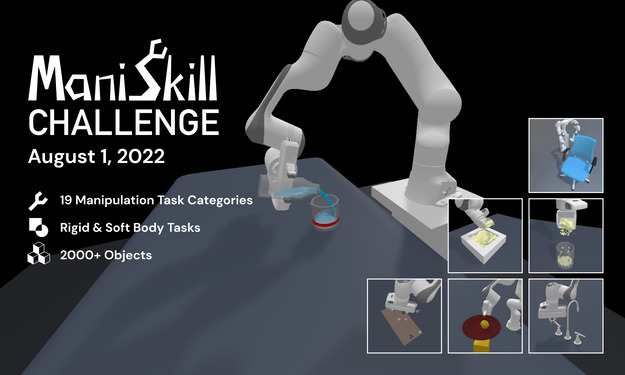
    <div  style="text-align: center;">Reinforcement Learning</div>
</div>

<div style="width: 49%; display: inline-block;" >
    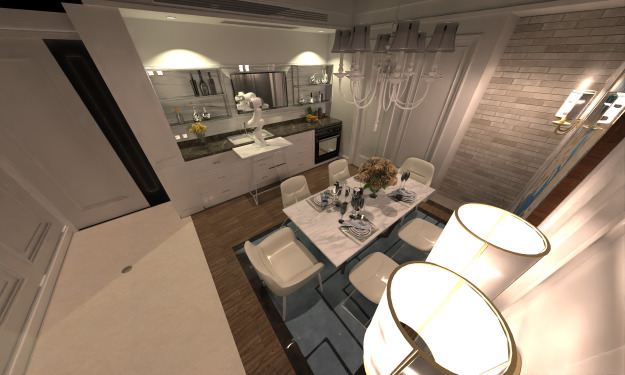
    <div  style="text-align: center;">Rendering</div>
</div>

In this tutorial series, you will learn the basics on how to use SAPIEN.

> Note: Some core features of SAPIEN are not available on Colab, including the interactive viewer and ray-tracing functionalities. You need to run SAPIEN locally for full features. A more comprehensive tutorial including features that are only available to local environment can be found at [SAPIEN's documentation](https://sapien.ucsd.edu/docs/2.2/index.html).

# Tutorial 1: Hello World

In this tutorial, you will learn the following:

- Create a simulation engine `Engine`
- Create a simulation scene `Scene`
- Create a camera `CameraEntity` to visualize the scene

## Preparation

**Note: you need GPU runtime to run the notebook.**

In [2]:
%pip install sapien
import sapien.core as sapien
import numpy as np
from PIL import Image

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Simulation engine and scene

To simulate with SAPIEN, you need to first create a simulation engine, and then create a simulation scene by the engine.


In [3]:
engine = sapien.Engine()  # Create a physical simulation engine
renderer = sapien.SapienRenderer()  # Create a renderer
engine.set_renderer(renderer)  # Bind the renderer and the engine

scene = engine.create_scene()  # Create an instance of simulation world (aka scene)
scene.set_timestep(1 / 100.0)  # Set the simulation frequency

`Engine` is the physical simulation engine connected to the [PhysX](https://gameworksdocs.nvidia.com/PhysX/4.1/documentation/physxguide/Manual/Index.html) backend. One engine per process is allowed. Creating additional engines without deleting (overwriting the variable, letting it go out of scope) a previous one will result in the same Engine being returned.

`Scene` is an instance of the simulation world. Multiple scenes can be created through `create_scene`, and they are independent.

`SapienRenderer` is the rendering engine connected to our [Vulkan](https://www.vulkan.org/)-based renderer. the renderer should first be bound with an engine, and then all the scenes created by the engine will be bound with the renderer.

## Add rigid bodies

So far, our scene is empty.

In SAPIEN, a simulated rigid body is named an `Actor`. Let’s add two actors, a ground and a box, to the scene.

In [4]:
scene.add_ground(altitude=0)  # Add a ground
actor_builder = scene.create_actor_builder()
actor_builder.add_box_collision(half_size=[0.5, 0.5, 0.5])
actor_builder.add_box_visual(half_size=[0.5, 0.5, 0.5], color=[1., 0., 0.])
box = actor_builder.build(name='box')  # Add a box
box.set_pose(sapien.Pose(p=[0, 0, 0.5]))

## Visualization

Until now, we still have no idea how our scene looks like. Let's visualize our scene with a camera. The camera, just like its name, is an entity capable of taking picture of the scene in front of it. That sounds just like the thing we need, right? Wait! To make the camera works, we are still lacking a very important thing: light. Our scene is currently in dark, so we cannot see things just with camera.

In conclusion, to get a visualization of the scene, we need the following three steps:
1. Add light to the scene.
2. Add camera to the scene.
3. Use the camera to take picture of the scene.

Let's see an example of how to achieve this.

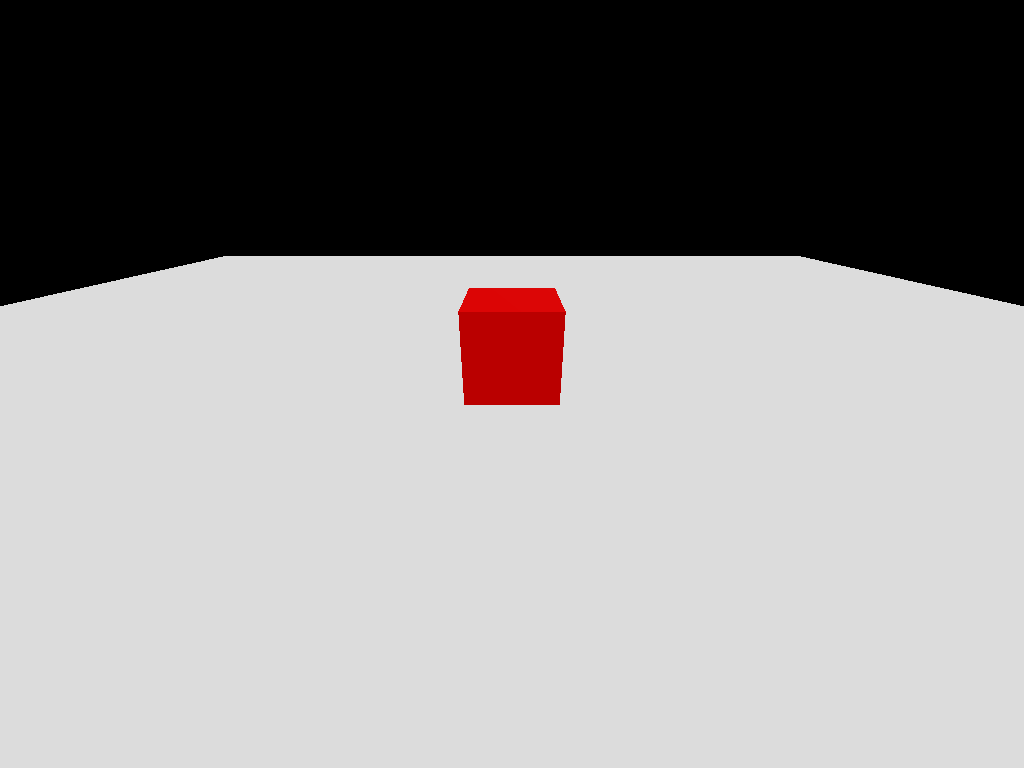

In [6]:
# Add some lights so that you can observe the scene
scene.set_ambient_light([0.5, 0.5, 0.5])
scene.add_directional_light([0, 1, -1], [0.5, 0.5, 0.5])

# Add a camera and set up its pose
camera = scene.add_camera(name='camera', width=1024, height=768, fovy=1.57, near=0.1, far=100)
camera.set_pose(sapien.Pose(p=[-4, 0, 2], q=[0.973249, 0, 0.229753, 0]))

# Take picture
scene.step() # Simulate the world
scene.update_render() # Update the world to the renderer
camera.take_picture() # Take picture and save the picture in camera's buffer
rgba = camera.get_color_rgba() # RGBA image, shape is [H, W, 4]

# Visualize
rgb = rgba[..., :3]
Image.fromarray((rgb*255).astype(np.uint8))

## Viewer

SAPIEN also supports an interactive `Viewer`, which allows easy scene navigation with GUI. The interface of `Viewer` looks like this and it is only available when run on a local machine with display (x-server).

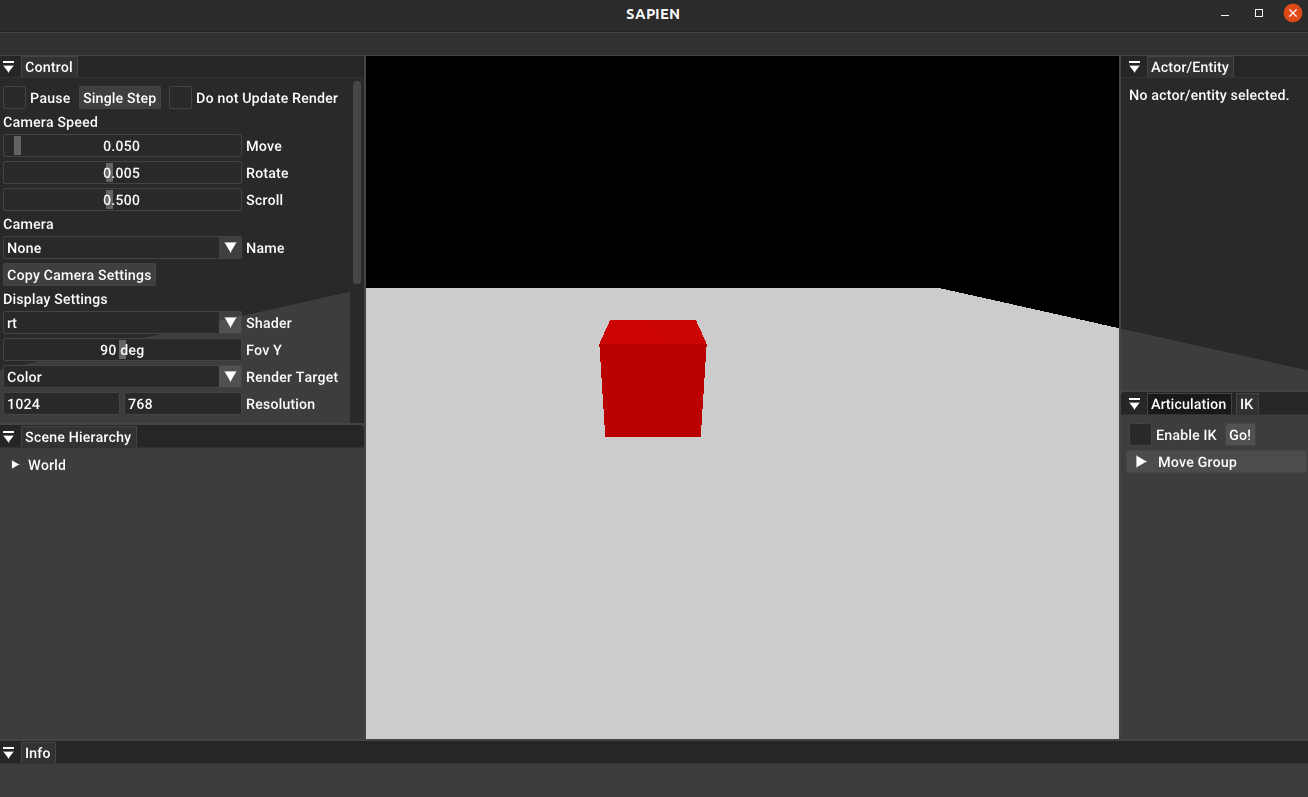